# Qunatum optimal control example 2

This is an example code for qunatum optimal of two control parameters. you can choose any Hamiltonian you want with two control parameters. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qoct2ctrl import QH, QOCT
%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and initial control parameters. We choose eigenstate of H0 as initial state phi_i and goal state phi_g respectively. 

In [15]:
U = 1.
eps_cos = 1.
eps_sin = 1.

H0 = [[0,U],[U,0]]
Hctr = [[eps_cos,0],[0,-eps_cos]]
Hctr2 = [[eps_sin,0],[0,-eps_sin]]
H = np.array(H0) + np.array(Hctr)

eig_val, eig_vec = np.linalg.eig(H)
phi_i = eig_vec[:,0].reshape(2,1)
phi_g = eig_vec[:,1].reshape(2,1)

N_time = 4000
ctrl = 1.*np.ones(N_time)
ctrl2 = 0.*np.ones(N_time)

Call QH module to build up equation of motion and states.

In [16]:
qh_test = QH(H0, Hctr, ctrl, Hctr2, ctrl2, phi_i)
time = qh_test.real_tim
"""
#Gauss pulse case
tau = time - time[len(time)/2]
A_guass = -.75*tau*np.exp(-tau**2/25.)
qh_test.ctrl = np.cos(A_guass)
qh_test.ctrl2 = np.sin(A_guass)

plt.plot(time[:], qh_test.ctrl,label = 'cos(A(t))')
plt.plot(time[:], qh_test.ctrl2, label = 'sin(A(t))')
plt.xlabel('Time')
plt.ylabel('Control')
plt.legend()
plt.show()
"""
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

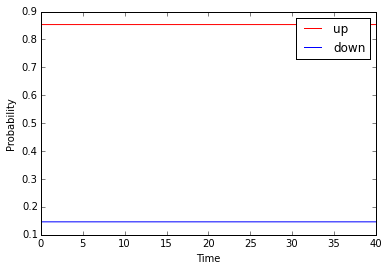

In [17]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin.

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

IterTime: 1,   Error: [[ 1.]],   TotTime: 6.342638,   AvgTime: 6.342642
IterTime: 2,   Error: [[ 0.72757502]],   TotTime: 12.992673,   AvgTime: 6.4963385
IterTime: 3,   Error: [[ 0.54641452]],   TotTime: 19.689114,   AvgTime: 6.56303933333
IterTime: 4,   Error: [[ 0.32275429]],   TotTime: 26.437817,   AvgTime: 6.609455
IterTime: 5,   Error: [[ 0.17362597]],   TotTime: 33.093004,   AvgTime: 6.6186016
IterTime: 6,   Error: [[ 0.08963487]],   TotTime: 39.957087,   AvgTime: 6.65951516667
IterTime: 7,   Error: [[ 0.04560511]],   TotTime: 46.676683,   AvgTime: 6.66809814286
IterTime: 8,   Error: [[ 0.02315413]],   TotTime: 53.32618,   AvgTime: 6.665773
IterTime: 9,   Error: [[ 0.01178663]],   TotTime: 60.277667,   AvgTime: 6.697519
IterTime: 10,   Error: [[ 0.00602271]],   TotTime: 67.469303,   AvgTime: 6.7469307
IterTime: 11,   Error: [[ 0.00308822]],   TotTime: 78.052457,   AvgTime: 7.09567827273
IterTime: 12,   Error: [[ 0.00158791]],   TotTime: 86.25795,   AvgTime: 7.18816283333
IterTime

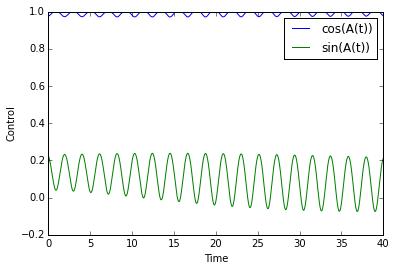

In [18]:
qh_test.ctrl = .9*np.ones(N_time)
qh_test.ctrl2 = .1*np.ones(N_time)
qoct_test = QOCT(qh_test, phi_g)
ctrl_test, ctrl2_test = qoct_test.run()
plt.plot(time[:-1], ctrl_test,label = 'cos(A(t))')
plt.plot(time[:-1], ctrl2_test, label = 'sin(A(t))')
plt.xlabel('Time')
plt.ylabel('Control')
plt.legend()
plt.show()

and probability variation in time.

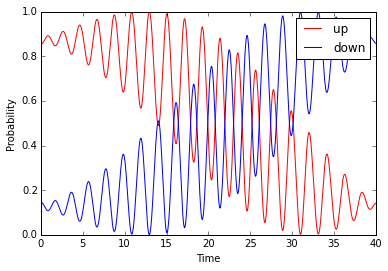

In [19]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

One can find a complete flip of probability after optimal control.

Following we consider a long time variation of probability and control comes in the middle time.

In [20]:
lon = np.size(ctrl_test)
ctrl_lon = np.ones(3*lon)
ctrl_lon[lon:2*lon ] = ctrl_test[:]
ctrl2_lon = np.zeros(3*lon)
ctrl2_lon[lon:2*lon ] = ctrl2_test[:]

One can plot the probability variation again.

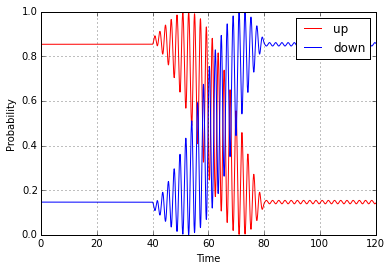

In [21]:
qh_test2 = QH(H0, Hctr, ctrl_lon, Hctr2, ctrl2_lon, phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.show()

A flip happend but also with a small fluctuation after optimal control.(Why?) 

We can also plot eigen energy variation in time.

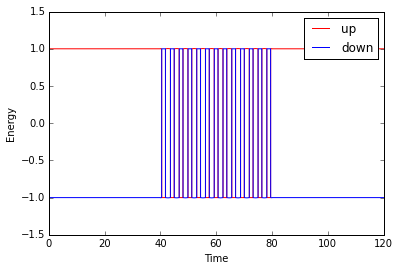

In [27]:
eigE2 = qh_test2.eigE_t()
plt.plot(time2[:-1], eigE2[:,0],'r',label = 'up')
plt.plot(time2[:-1], eigE2[:,1],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.show()